In [1]:
import csv
import re
import glob
import datetime
from pathlib import Path
import pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import simpledialog
print(matplotlib.matplotlib_fname())
from functions import queueDirectoryPath, guiYesNo

C:\Users\andre\.matplotlib\matplotlibrc


In [3]:
data_path = queueDirectoryPath(Path.cwd(), header="Select logs data directory.")# If user closes program
if data_path is None:
    raise Exception("File path is does not exit or user closed program.")
    sys.exit()
# If user enters non-existant path or closes the dialog box
if not os.path.exists(data_path):
    raise Exception("File path is does not exit or user closed program.")
    sys.exit()

save_path = data_path / "figures"

# Make the save path if it does not exits
if not os.path.exists(save_path): os.makedirs(save_path)
 
# Print what the models path defined and the save path defined
print(f"\nThe data will be queued from:\n {data_path}\n")
print(f"The figures will be saved to:\n {save_path}")

You chose C:/Users/andre/Documents/GitHub/Albright_A/Graduate School/Classes/ENGR 635/Three Link Serial Manipulator/Training_Data/TD3/NonLimited_Random/logs_plotting_data

The data will be queued from:
 C:\Users\andre\Documents\GitHub\Albright_A\Graduate School\Classes\ENGR 635\Three Link Serial Manipulator\Training_Data\TD3\NonLimited_Random\logs_plotting_data

The figures will be saved to:
 C:\Users\andre\Documents\GitHub\Albright_A\Graduate School\Classes\ENGR 635\Three Link Serial Manipulator\Training_Data\TD3\NonLimited_Random\logs_plotting_data\figures


In [4]:
# sort the files read in
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

files = sorted(glob.glob(str(data_path / '*.csv')), key=numericalSort)

print(f'Number of Agents found: {len(files)}\n')

# import the data
data = []
for file in files:
    data.append(pandas.read_csv(file))

print(data[0])

Number of Agents found: 2

        Wall time    Step       Value
0    1.638580e+09    1200  300.000000
1    1.638580e+09    2264  283.000000
2    1.638580e+09    3271  272.583344
3    1.638580e+09    4471  279.437500
4    1.638580e+09    5525  276.250000
..            ...     ...         ...
875  1.638603e+09  995373  281.339996
876  1.638603e+09  996573  281.339996
877  1.638603e+09  997642  280.029999
878  1.638603e+09  998842  280.029999
879  1.638603e+09  999726  276.869995

[880 rows x 3 columns]


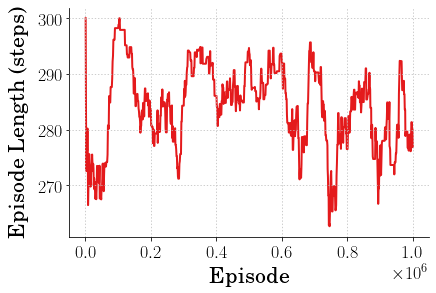

In [8]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Episode', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Episode Length (steps)', fontsize=22, weight='bold', labelpad=10)

plt.plot(data[0]["Step"], data[0]["Value"], linewidth=2, linestyle='-', label="Height = Max")

# uncomment below and set limits if needed
# plt.xlim(0,4)
# plt.ylim(bottom=None, top=.35)

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'Episode_Length{}.svg'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = save_path / filename
plt.savefig(path, transparent=True)
plt.show()

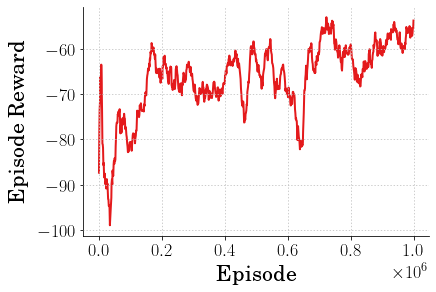

In [7]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Episode', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Episode Reward', fontsize=22, weight='bold', labelpad=10)

plt.plot(data[1]["Step"], data[1]["Value"], linewidth=2, linestyle='-', label="Height = Max")

# uncomment below and set limits if needed
# plt.xlim(0,4)
# plt.ylim(bottom=None, top=.35)

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'Episode_Reward{}.svg'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = save_path / filename
plt.savefig(path, transparent=True)
plt.show()